In [6]:
import scipy.io as sio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

mat = sio.loadmat('songResponses.mat')
mat_prop = sio.loadmat('proportions.mat')

In [2]:
mat["SONGCELL"].shape

(1000, 1)

In [3]:
Joy = 5
Groove = 7
Awe = 8
Anxiety = 10
Disgust = 11
Anger = 12

In [10]:
# use nos insdf grv

# def metric: diff in 
#    geo mean of 
#       alg mean of joy, alg mean of groove, and alg mean of Awe and 
#    geo mean of 
#       alg mean of Anxiety, alg mean of Disgust, and alg mean of Anger
pos_geo_mean_320 = (mat_prop["temp2"][:320, 5] * mat_prop["temp2"][:320, 6] * mat_prop["temp2"][:320, 8]) ** (1/3)
neg_geo_mean_320 = (mat_prop["temp2"][:320, 10] * mat_prop["temp2"][:320, 11] * mat_prop["temp2"][:320, 12]) ** (1/3)
metric_320 = list(enumerate(pos_geo_mean_320 - neg_geo_mean_320))
pos_geo_mean_679 = (mat_prop["temp2"][320:999, 5] * mat_prop["temp2"][320:999, 6] * mat_prop["temp2"][320:999, 8]) ** (1/3)
neg_geo_mean_679 = (mat_prop["temp2"][320:999, 10] * mat_prop["temp2"][320:999, 11] * mat_prop["temp2"][320:999, 12]) ** (1/3)
metric_679 = list(enumerate(pos_geo_mean_679 - neg_geo_mean_679))

# select 30 most pos and 30 most neg (with re-indexing by + 1)
pos_320 = sorted(metric_320, key = lambda x: x[1], reverse = True)[:15]
pos_320 = [(i[0] + 1, i[1]) for i in pos_320]
neg_320 = sorted(metric_320, key = lambda x: x[1], reverse = False)[:15]
neg_320 = [(i[0] + 1, i[1]) for i in neg_320]
pos_679 = sorted(metric_679, key = lambda x: x[1], reverse = True)[:15]
pos_679 = [(i[0] + 321, i[1]) for i in pos_679]
neg_679 = sorted(metric_679, key = lambda x: x[1], reverse = False)[:15]
neg_679 = [(i[0] + 321, i[1]) for i in neg_679]

# extract idx
pos_idx = []
for i in pos_320:
    pos_idx.append(i[0])
for i in pos_679:
    pos_idx.append(i[0])

neg_idx = []
for i in neg_320:
    neg_idx.append(i[0])
for i in neg_679:
    neg_idx.append(i[0])

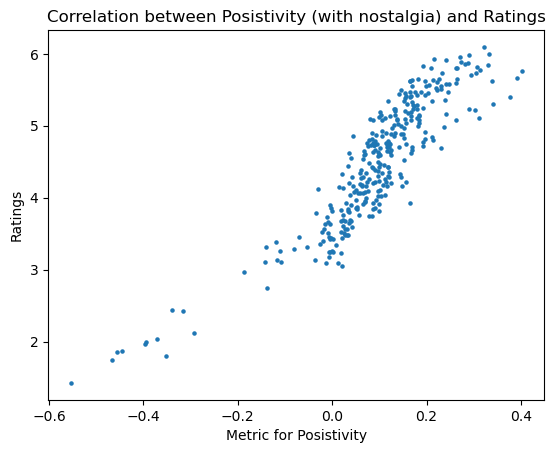

In [11]:
import matplotlib.pyplot as plt

plt.scatter(pos_geo_mean_320 - neg_geo_mean_320, mat_prop["temp2"][:320, 3], 5)
plt.title("Correlation between Posistivity (with nostalgia) and Ratings")
plt.ylabel("Ratings")
plt.xlabel("Metric for Posistivity")
plt.show()

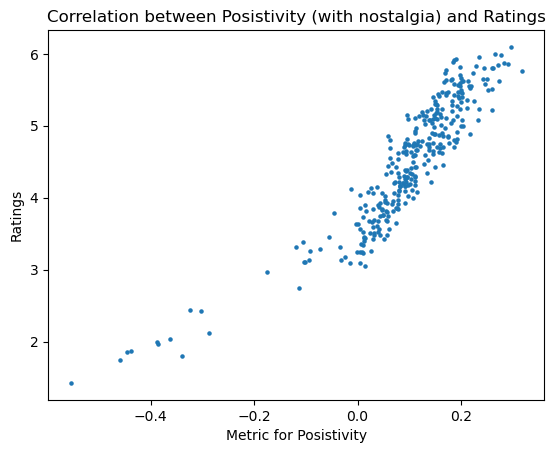

In [20]:
# use nos insdf grv

# def metric: diff in 
#    geo mean of 
#       alg mean of joy, alg mean of groove, and alg mean of Awe and 
#    geo mean of 
#       alg mean of Anxiety, alg mean of Disgust, and alg mean of Anger
pos_geo_mean_320 = (mat_prop["temp2"][:320, 5] * mat_prop["temp2"][:320, 7] * mat_prop["temp2"][:320, 8]) ** (1/3)
neg_geo_mean_320 = (mat_prop["temp2"][:320, 10] * mat_prop["temp2"][:320, 11] * mat_prop["temp2"][:320, 12]) ** (1/3)
metric_320 = list(enumerate(pos_geo_mean_320 - neg_geo_mean_320))
pos_geo_mean_679 = (mat_prop["temp2"][320:999, 5] * mat_prop["temp2"][320:999, 7] * mat_prop["temp2"][320:999, 8]) ** (1/3)
neg_geo_mean_679 = (mat_prop["temp2"][320:999, 10] * mat_prop["temp2"][320:999, 11] * mat_prop["temp2"][320:999, 12]) ** (1/3)
metric_679 = list(enumerate(pos_geo_mean_679 - neg_geo_mean_679))

# select 30 most pos and 30 most neg (with re-indexing by + 1)
pos_320 = sorted(metric_320, key = lambda x: x[1], reverse = True)[:15]
pos_320 = [(i[0] + 1, i[1]) for i in pos_320]
neg_320 = sorted(metric_320, key = lambda x: x[1], reverse = False)[:15]
neg_320 = [(i[0] + 1, i[1]) for i in neg_320]
pos_679 = sorted(metric_679, key = lambda x: x[1], reverse = True)[:15]
pos_679 = [(i[0] + 321, i[1]) for i in pos_679]
neg_679 = sorted(metric_679, key = lambda x: x[1], reverse = False)[:15]
neg_679 = [(i[0] + 321, i[1]) for i in neg_679]

# extract idx
pos_idx = []
for i in pos_320:
    pos_idx.append(i[0])
for i in pos_679:
    pos_idx.append(i[0])

neg_idx = []
for i in neg_320:
    neg_idx.append(i[0])
for i in neg_679:
    neg_idx.append(i[0])

plt.scatter(pos_geo_mean_320 - neg_geo_mean_320, mat_prop["temp2"][:320, 3], 5)
plt.title("Correlation between Posistivity (with nostalgia) and Ratings")
plt.ylabel("Ratings")
plt.xlabel("Metric for Posistivity")
plt.show()

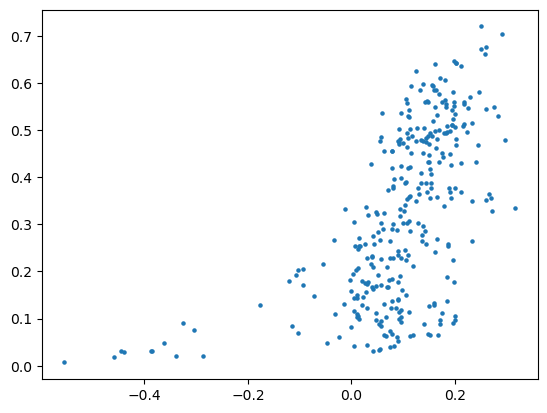

In [21]:
plt.scatter(pos_geo_mean_320 - neg_geo_mean_320, mat_prop["temp2"][:320, 7], 5)

In [22]:
music_lib = pd.read_excel('MusicTable.xlsx').iloc[:, :8]
source_lib = pd.read_excel('MusicTable.xlsx').iloc[:6, [8]]
genre_lib = pd.read_excel('MusicTable.xlsx').iloc[:9, [9]]
music_lib.replace(' ', np.nan, inplace=True)
music_lib = music_lib.dropna()

In [23]:
re_pos_idx = [i-1 for i in pos_idx]
re_neg_idx = [i-1 for i in neg_idx]

pos_mus = music_lib.iloc[re_pos_idx]
neg_mus = music_lib.iloc[re_neg_idx]

In [24]:
neg_mus.to_csv("neg_music.csv")

In [25]:
pos_mus.to_csv("pos_music.csv")